# **ANTHEA'S INDIVIDUAL PROJECT PLANNING STAGE** 
### **Question 2:**
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

PART 1:
I will analyse the entire data set in details and then the individual planning report will be right below all the codes and plots

PART 2:
The Individual Planning Report


# PART 1 - data analysis & planning
I would like to read the players.csv and sessions.csv files into R
- This allows me to analyze and manipulate the data for further exploration.
- I can inspect the structure of the datasets using head() to understand their contents.

In [42]:
library(readr)
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

sessions_raw <- read_csv("https://raw.githubusercontent.com/Zitong06/DSCI100-Group-Project-005-45/refs/heads/main/sessions.csv")
players_raw <- read_csv("https://raw.githubusercontent.com/Zitong06/DSCI100-Group-Project-005-45/refs/heads/main/players.csv")

head(sessions_raw)
head(players_raw)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


I wanted to count how many times each person (email) appears in the dataset and created a new table with just emails and their total logins. This is because I noticed that in the dataset, the same email address / hashed email would appear more than once in the same column. This was when I realised that the start_time and end_time of means the duration they took to play in the game, and the repeated email address means that they logged in to the game more than once. This prompted me to do this step as I wanted to know how many times each one of them logged into the game. This can be effective in helping me solve Question 2 as I can now breifly know who to focus on, and who actually likes the game enough to log in more than once.

In [43]:
sessions_email_counts <- sessions_raw |>
                         group_by(hashedEmail) |>
                         summarise(Count = n())
sessions_email_counts

hashedEmail,Count
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


In [44]:
players_with_counts <- players_raw |>
                       left_join(sessions_email_counts, by = "hashedEmail")

head(players_with_counts)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,Count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


I merged the sessions_email_counts data (which contains the counts of logins) with the players_raw data, based on the hashedEmail column. This will allow you to add a new column to players_raw that indicates how many times each player has logged into the game (based on sessions_email_counts). Now, I can compare the amount of times each player has logged in with the Count column in the players_raw data!

In [45]:
Per_subscribe <- players_with_counts |>
  group_by(subscribe) |>
  summarise(
    count = n(),
    sum_played_hours = sum(played_hours, na.rm = TRUE),
  )

experience_count <- players_with_counts |>
  group_by(subscribe, experience) |>
  summarise(amount = n()) |>
  filter(experience %in% c("Amateur", "Pro", "Regular", "Veteran", "Beginner"))

experience_count_pivot <- experience_count |>
  pivot_wider(names_from = experience, values_from = amount, values_fill = list(amount = 0))

experience_count_pivot

grand_total_played_hours <- sum(players_with_counts$played_hours, na.rm = TRUE)

Per_subscribe <- Per_subscribe |>
  mutate(
    percentage_played_hours = (sum_played_hours / grand_total_played_hours) * 100
  )

Per_subscribe

print("Grand Total for sum_played_hours:")
print(grand_total_played_hours)

`summarise()` has grouped output by 'subscribe'. You can override using the
`.groups` argument.


subscribe,Amateur,Beginner,Pro,Regular,Veteran
<lgl>,<int>,<int>,<int>,<int>,<int>
FALSE,18,8,4,7,15
TRUE,45,27,10,29,33


subscribe,count,sum_played_hours,percentage_played_hours
<lgl>,<int>,<dbl>,<dbl>
FALSE,52,26.1,2.277884
TRUE,144,1119.7,97.722116


[1] "Grand Total for sum_played_hours:"
[1] 1145.8


In this analysis, I examined the data of players based on their subscription status (subscribed vs. non-subscribed) and experience levels to determine their contribution to the overall data, particularly the total played hours. By grouping the data by subscription status, I calculated the total count of players, the sum of played hours, and the percentage of played hours contributed by each group (subscribed and non-subscribed). The total played hours across all players amounted to 1145.8 hours, with subscribed players contributing 97.72% (1119.7 hours) and non-subscribed players contributing only 2.28% (26.1 hours). This highlights the higher engagement of subscribed players, who are more involved in the game. The breakdown of players by experience level showed that both subscribed and non-subscribed groups have a mix of Amateurs, Beginners, Pros, Regulars, and Veterans, with a larger proportion of subscribed players being in the Regular and Veteran categories. This suggests that targeting experienced, subscribed players could enhance recruitment and data contribution. Additionally, the analysis shows that although non-subscribed players represent a larger group by count, subscribed players, particularly those in the Regular and Veteran categories, contribute far more to the total played hours, making them a more valuable target for recruitment efforts. In conclusion, focusing on subscribed veteran and regular players for recruitment efforts is likely to yield the most significant returns in terms of engagement and data contribution, while encouraging non-subscribed players to subscribe could further boost overall engagement.

In [46]:
Per_experience <- players_with_counts |>
  group_by(experience) |>
  summarise(
    count = n(),
    sum_exp_played_hours = sum(played_hours, na.rm = TRUE)) 

grand_total_exp_played_hours <- sum(players_with_counts$played_hours, na.rm = TRUE)

Per_experience <- Per_experience |>
  mutate(
    percentage_played_hours = (sum_exp_played_hours / grand_total_exp_played_hours) * 100
  )

Per_experience

print("Grand Total for sum_played_hours:")
print(grand_total_exp_played_hours)

experience,count,sum_exp_played_hours,percentage_played_hours
<chr>,<int>,<dbl>,<dbl>
Amateur,63,379.1,33.086053
Beginner,35,43.7,3.813929
Pro,14,36.4,3.176820
Regular,36,655.5,57.208937
Veteran,48,31.1,2.714261


[1] "Grand Total for sum_played_hours:"
[1] 1145.8


This analysis helps answer the question of which kinds of players are most likely to contribute a large amount of data for recruiting efforts by examining the distribution of played hours and subscription rates across different experience levels. The total played hours across all players amounts to 1145.8 hours, with Regular players contributing the largest portion (57.2%) and having a relatively high subscription rate, indicating they are the most engaged and should be prioritized in recruitment. Amateurs, who contribute 33.1% of the total played hours, also show significant subscription activity, making them another important group to target. Although Veterans have the highest number of players, they contribute only 2.7% of the total played hours and have low subscription rates, suggesting they might not be as engaged with the community. Beginners and Pros show moderate contributions to both played hours and subscriptions, indicating a need for more engagement. Overall, the analysis reveals that Regular and Amateur players are the most likely to contribute meaningful data, with Regular players being the most active and subscribed group, making them the key target for recruitment and outreach efforts.

In [47]:
Per_gender <- players_with_counts |>
  group_by(gender) |>
  summarise(
    count = n(),
    sum_gen_played_hours = sum(played_hours, na.rm = TRUE)) 

grand_total_gen_played_hours <- sum(players_with_counts$played_hours, na.rm = TRUE)

Per_gender <- Per_gender |>
  mutate(
    percentage_played_hours = (sum_gen_played_hours / grand_total_gen_played_hours) * 100,
    mean_played_hours_per_person = sum_gen_played_hours / count
  )

Per_gender |> 
    arrange(desc(count)) |> 
    head(6)

print("Grand Total for sum_played_hours:")
print(grand_total_gen_played_hours)

gender,count,sum_gen_played_hours,percentage_played_hours,mean_played_hours_per_person
<chr>,<int>,<dbl>,<dbl>,<dbl>
Male,124,511.8,44.66748124,4.12741935
Female,37,393.5,34.34281725,10.63513514
Non-binary,15,223.2,19.47983941,14.88000000
Prefer not to say,11,4.1,0.35782859,0.37272727
Two-Spirited,6,0.5,0.04363763,0.08333333
Agender,2,12.5,1.09094083,6.25000000


[1] "Grand Total for sum_played_hours:"
[1] 1145.8


In this analysis, I used R to examine the relationship between player gender and their contribution to the total played hours to determine which gender groups provide the most data. Using the group_by() and summarise() functions in dplyr, I calculated the total count of players in each gender category, the sum of played hours for each group, the percentage of total played hours contributed by each group, and the mean played hours per person. After computing these values, I sorted the data in descending order based on player count using arrange(desc(count)), and I displayed only the first six rows, as the last row represented an “Other” category with only one person, contributing negligible data. The total sum of played hours across all players is 1145.8 hours, with males having the highest number of players (124) and contributing 44.67% (511.8 hours) of the total played hours. However, an interesting observation is that females, despite having only 37 players, contribute a significant 34.34% (393.5 hours) of the total played hours, which means that the ratio of played hours per person is much higher for females compared to males. This is confirmed by the mean played hours per person, where females average 10.64 hours per player, while males average only 4.13 hours per player. Similarly, non-binary players, though fewer in number (15), have an even higher mean of 14.88 hours per person, suggesting that non-binary and female players, on average, are more engaged in the game than male players. This information is beneficial for answering Question 2 because it allows us to identify which gender groups are the most engaged and contribute the most data. Since females and non-binary players have higher average playtime, targeting them for recruiting efforts, such as newsletter subscriptions or in-game incentives, may be an effective strategy to gather more data. Additionally, analyzing gender-based engagement patterns helps refine marketing strategies and recruitment efforts to attract the most dedicated players, ensuring that the highest contributors to game data remain engaged. Lastly, further examination into how gender affects engagement levels can help improve player retention and game design strategies.

In [48]:
Per_age <- players_with_counts |>
  group_by(Age) |>
  summarise(
    count = n(),
    sum_age_played_hours = sum(played_hours, na.rm = TRUE)) 

grand_total_age_played_hours <- sum(players_with_counts$played_hours, na.rm = TRUE)

Per_age <- Per_age |>
  mutate(
    percentage_played_hours = (sum_age_played_hours / grand_total_age_played_hours) * 100,
    mean_played_hours_per_person = sum_age_played_hours / count
  )

Per_age_sum_desc <- Per_age |> 
    arrange(desc(sum_age_played_hours)) |> 
    head(6)

Per_age_count_desc <- Per_age |> 
    arrange(desc(count)) |> 
    head(6)

Per_age_sum_desc
Per_age_count_desc

print("Grand Total for sum_played_hours:")
print(grand_total_age_played_hours)

Age,count,sum_age_played_hours,percentage_played_hours,mean_played_hours_per_person
<dbl>,<int>,<dbl>,<dbl>,<dbl>
17,75,356.8,31.139815,4.757333
20,14,221.6,19.340199,15.828571
19,7,179.6,15.674638,25.657143
16,3,150.1,13.100017,50.033333
23,13,59.8,5.219061,4.600000
22,15,37.3,3.255367,2.486667


Age,count,sum_age_played_hours,percentage_played_hours,mean_played_hours_per_person
<dbl>,<int>,<dbl>,<dbl>,<dbl>
17,75,356.8,31.139815,4.757333
21,18,13.5,1.178216,0.750000
22,15,37.3,3.255367,2.486667
20,14,221.6,19.340199,15.828571
23,13,59.8,5.219061,4.600000
24,10,29.2,2.548438,2.920000


[1] "Grand Total for sum_played_hours:"
[1] 1145.8


In [49]:
players_with_counts |> 
    arrange(desc(played_hours)) |> 
    head(6)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,Count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20,95
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19,147
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17,130


In this analysis, I examined the relationship between player age and their total contribution to played hours to determine which age groups provide the most data. Using the group_by() and summarise() functions in dplyr, I calculated the total count of players in each age group, the sum of played hours per age, the percentage of the total played hours contributed by each age group, and the mean played hours per person. To further analyze trends, I sorted the data in two ways: first by sum_age_played_hours in descending order to identify which age groups contribute the most gameplay hours, and second by count in descending order to see which age groups have the highest number of players. The grand total of played hours across all age groups is 1145.8 hours, with 17-year-olds contributing the highest amount at 356.8 hours (31.14% of the total), followed by 20-year-olds with 221.6 hours (19.34%) and 19-year-olds with 179.6 hours (15.67%). Interestingly, while 17-year-olds had the most players (75), the mean played hours per person were significantly higher for 16-year-olds (50.03 hours per person) and 19-year-olds (25.66 hours per person), suggesting that despite having fewer players, these age groups are among the most engaged. This insight is valuable for answering Question 2, as it helps identify which player groups are most likely to contribute substantial gameplay data. For recruitment efforts, targeting younger players, particularly those aged 17 to 20, would be beneficial since they have both high participation rates and significant contributions to played hours. Additionally, through this analysis, I noticed an anomaly in the data—four individuals (Hiroshi, Akio, Piper, and Delara) had an unusually high number of played hours, disproportionately influencing the dataset. For example, Akio, a non-binary player, alone accounted for 218.1 hours out of the total 223.2 non-binary played hours, which skews the representation of non-binary players’ engagement. These outliers make it difficult to draw accurate conclusions from the data, as their extreme values distort the averages and percentages for their respective groups. Recognizing this issue is crucial when making data-driven decisions, as filtering or adjusting for such extreme values may provide a clearer and more representative view of player trends. Lastly, another key observation is that while some age groups, like 21-year-olds and 24-year-olds, have relatively high player counts, their total played hours remain low, indicating that merely having more players in a group does not necessarily mean they contribute the most to game data. These insights can help refine recruitment efforts by focusing on player groups that not only have a high number of members but also demonstrate high engagement levels.

In [50]:
players_without_outliers <- players_with_counts |> 
  filter(!name %in% c("Hiroshi", "Akio", "Piper", "Delara"))

players_without_outliers

experience,subscribe,hashedEmail,played_hours,name,gender,Age,Count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,1


In [51]:
Per_age <- players_without_outliers |>
  group_by(Age) |>
  summarise(
    count = n(),
    sum_age_played_hours = sum(played_hours, na.rm = TRUE)) 

grand_total_age_played_hours <- sum(players_without_outliers$played_hours, na.rm = TRUE)

Per_age <- Per_age |>
  mutate(
    percentage_played_hours = (sum_age_played_hours / grand_total_age_played_hours) * 100,
    mean_played_hours_per_person = sum_age_played_hours / count
  )

Per_age_sum_desc <- Per_age |> 
    arrange(desc(sum_age_played_hours)) |> 
    head(6)

Per_age_count_desc <- Per_age |> 
    arrange(desc(count)) |> 
    head(6)

Per_age_sum_desc
Per_age_count_desc

print("Grand Total for sum_played_hours:")
print(grand_total_age_played_hours)



Age,count,sum_age_played_hours,percentage_played_hours,mean_played_hours_per_person
<dbl>,<int>,<dbl>,<dbl>,<dbl>
17,74,133.7,35.520723,1.806757
23,13,59.8,15.887354,4.600000
22,15,37.3,9.909671,2.486667
9,1,30.3,8.049947,30.300000
24,10,29.2,7.757705,2.920000
49,1,18.5,4.914984,18.500000


Age,count,sum_age_played_hours,percentage_played_hours,mean_played_hours_per_person
<dbl>,<int>,<dbl>,<dbl>,<dbl>
17,74,133.7,35.5207226,1.8067568
21,18,13.5,3.5866100,0.7500000
22,15,37.3,9.9096706,2.4866667
20,13,3.5,0.9298618,0.2692308
23,13,59.8,15.8873539,4.6000000
24,10,29.2,7.7577046,2.9200000


[1] "Grand Total for sum_played_hours:"
[1] 376.4


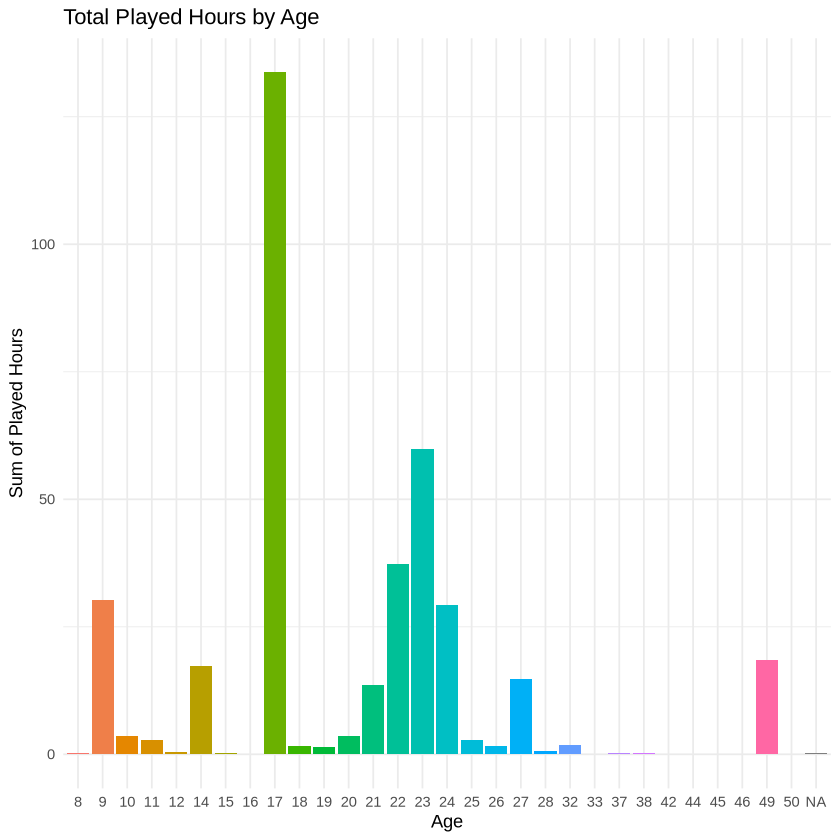

In [52]:
ggplot(Per_age, aes(x = as.factor(Age), y = sum_age_played_hours, fill = as.factor(Age))) +
  geom_bar(stat = "identity") +
  labs(title = "Total Played Hours by Age", x = "Age", y = "Sum of Played Hours") +
  theme_minimal() +
  theme(legend.position = "none")

The bar plot shows which age groups contribute the most to total played hours. The 17-year-old group stands out as having the highest total played hours, even after removing outliers. This suggests that players in this age group are a key demographic to target for recruitment, as they are the most engaged. Other age groups, such as 23 and 22-year-olds, also contribute a notable amount, but their total hours are significantly lower than 17-year-olds.

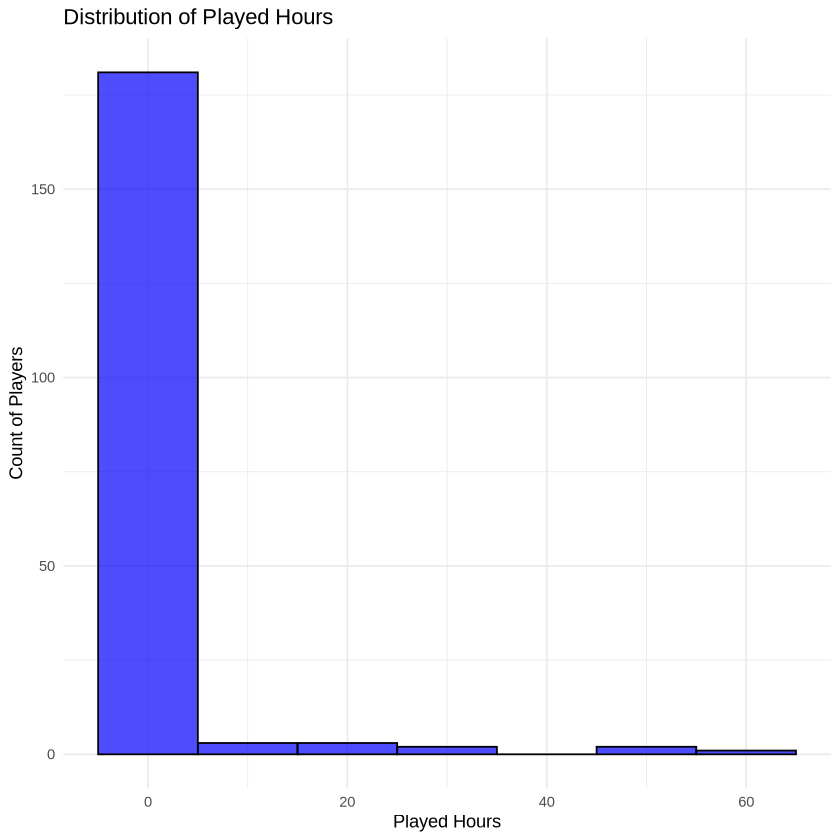

In [53]:
ggplot(players_without_outliers, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Played Hours", x = "Played Hours", y = "Count of Players") +
  theme_minimal()

The histogram gives insight into how playtime is distributed among players. Most players have relatively low playtime, with only a few reaching higher played hours. This confirms that while some players contribute significantly, the majority do not play extensively. The binwidth of 10 hours helps show how many players fall into different hour ranges, making it clear that heavily engaged players are in the minority but contribute a large portion of total hours.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


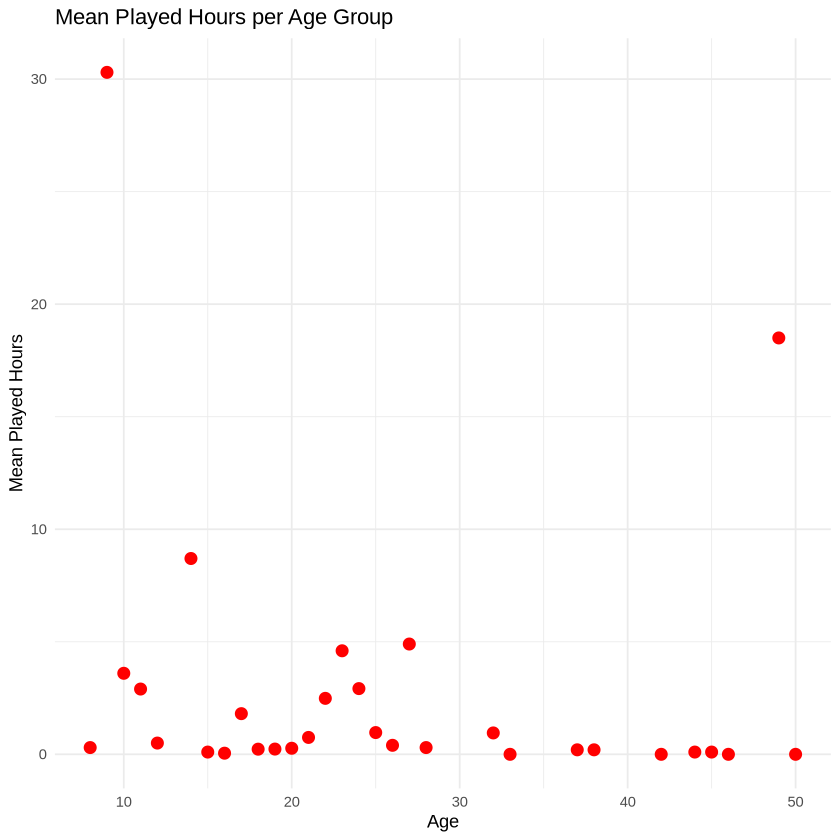

In [54]:
ggplot(Per_age, aes(x = Age, y = mean_played_hours_per_person)) +
  geom_point(color = "red", size = 3) +
  labs(title = "Mean Played Hours per Age Group", x = "Age", y = "Mean Played Hours") +
  theme_minimal()

The scatter plot provides insight into which age groups have the highest mean playtime per person. The 9-year-old and 49-year-old groups have the highest mean played hours, but this could be due to their small sample sizes. Excluding these anomalies, 23-year-olds and 22-year-olds show higher average engagement than other ages. This suggests that while 17-year-olds play the most in total, individual players in their 20s tend to play longer sessions.

# PART 2 - Individual Planning Report

#### Question 2: 
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

## 1.  Data Description

The dataset consists of 196 records, capturing various attributes of players, including their gaming experience, subscription status, age, gender, and total played hours. The primary goal is to determine which types of players contribute the most gaming data, enabling targeted recruitment efforts.

**Key Observations:**

- The dataset includes 196 players, of which 144 are subscribers contributing 1120 played hours, while 52 non-subscribers contribute only 26 hours.

- A small subset of 4 players account for 770 hours (67% of total played time), indicating extreme outliers.

- Age distribution is concentrated between 17 to 24 years old, representing the most active group.

- Gender distribution suggests a male-dominated player base, but engagement levels appear similar across genders.

- Experience levels do not show a clear impact on played hours.

**Potential issues include:**

- The data is highly influenced by a few extreme values.

- Subscription status seems to be a dominant factor in playtime distribution.

## 2. Research Question

To optimize recruitment efforts, we aim to determine:

*"How do different age groups contribute to total playtime, and what are their peak gaming hours?"*

**Explanation:**

- The response variable is played hours, which measures the contribution of each player.

- The explanatory variables include age and time of gameplay, helping to identify peak engagement times.

- Understanding when and how different age groups play will allow for more targeted recruitment strategies.

## 3. Exploratory Data Analysis and Visualization

To explore the dataset, we:

1. Load the dataset into R and clean any inconsistencies. For example, remove extreme outliers and organize the data in a tidy format.

2. Compute mean values for each numerical variable, particularly focusing on played hours per age group.

3. Generate visualizations to provide insight into player behavior:

    - Bar Chart: Displays total played hours per age group.

    - Histogram: Shows the distribution of played hours across players.

    - Scatterplot: Illustrates played Hours by Age

**Key Insights from Visualizations:**

- The most active players fall between the ages of 17 to 24, with 17-year-olds contributing the most gaming hours. This suggests that targeting younger players could be beneficial for recruitment efforts.

- The histogram shows a right-skewed distribution, with most players having low playtime and only a few contributing significantly. This confirms the presence of outliers dominating the total playtime.

- There is no strong correlation between age and played hours, but younger players tend to have higher variance in playtime. This suggests that while age is a factor, other variables like subscription status or experience level may have a stronger influence.

## 4. Methods and Plan

To analyze the relationship between age, playtime, and peak hours, we propose using:
Regression Analysis (Multivariable Linear Regression)

**Justification:**

- Suitable for examining how age and time influence playtime.

- Can measure how different age groups contribute to total played hours.

- Helps predict peak gaming hours for targeted recruitment strategies.

**Assumptions & Limitations:**

- Assumes a linear relationship between explanatory variables and playtime.

- May require data transformations if relationships are non-linear.

- Outliers may need to be removed to improve model accuracy.

**Data Processing Plan:**

- Split the dataset into training (70%) and testing (30%) sets.

- Apply cross-validation to improve model reliability.

- Test different models (e.g., polynomial regression) if necessary.

- Evaluate model performance using R-squared and residual analysis.